<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(1_2)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_1.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_1.2_n20.csv',
 'data_multi_delta_1.2_n30.csv',
 'data_multi_delta_1.2_n60.csv',
 'data_multi_delta_1.2_n120.csv',
 'data_multi_delta_1.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.2_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,83.633334,33.734233,84.260308,11.086369,222.714243,214.089837,8.624406
1,0.0,1.0,60.323686,68.860265,73.123589,-6.197590,206.109950,212.197484,-6.087534
2,0.0,2.0,32.141175,45.491152,86.561081,0.607265,174.800673,173.996571,0.804102
3,0.0,3.0,72.880381,21.200705,83.227093,-10.605430,176.702749,189.657437,-12.954688
4,0.0,4.0,20.759071,81.147665,88.173902,-25.138337,174.942302,198.248237,-23.305935
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,96.373498,34.297171,42.241538,-4.744698,178.167509,183.053206,-4.885697
249996,999.0,246.0,98.493450,47.222002,46.196062,2.681844,204.593357,201.681190,2.912167
249997,999.0,247.0,36.332791,38.747684,82.707809,14.428103,182.216388,167.009336,15.207052
249998,999.0,248.0,38.725677,45.879204,35.021734,3.424839,133.051454,127.003114,6.048340


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,83.633334,33.734233,84.260308,11.086369,222.714243,214.089837,8.624406
1,0.0,1.0,60.323686,68.860265,73.123589,-6.197590,206.109950,212.197484,-6.087534
2,0.0,2.0,32.141175,45.491152,86.561081,0.607265,174.800673,173.996571,0.804102
3,0.0,3.0,72.880381,21.200705,83.227093,-10.605430,176.702749,189.657437,-12.954688
4,0.0,4.0,20.759071,81.147665,88.173902,-25.138337,174.942302,198.248237,-23.305935
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,96.373498,34.297171,42.241538,-4.744698,178.167509,183.053206,-4.885697
249996,999.0,246.0,98.493450,47.222002,46.196062,2.681844,204.593357,201.681190,2.912167
249997,999.0,247.0,36.332791,38.747684,82.707809,14.428103,182.216388,167.009336,15.207052
249998,999.0,248.0,38.725677,45.879204,35.021734,3.424839,133.051454,127.003114,6.048340


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    83.633334  33.734233  84.260308  11.086369  222.714243   
      1.0    60.323686  68.860265  73.123589  -6.197590  206.109950   
      2.0    32.141175  45.491152  86.561081   0.607265  174.800673   
      3.0    72.880381  21.200705  83.227093 -10.605430  176.702749   
      4.0    20.759071  81.147665  88.173902 -25.138337  174.942302   
...                ...        ...        ...        ...         ...   
999.0 245.0  96.373498  34.297171  42.241538  -4.744698  178.167509   
      246.0  98.493450  47.222002  46.196062   2.681844  204.593357   
      247.0  36.332791  38.747684  82.707809  14.428103  182.216388   
      248.0  38.725677  45.879204  35.021734   3.424839  133.051454   
      249.0  84.207032  49.957643  97.038975   1.990327  243.193977   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    214.089837   8.624406  
      1.0    212.197484  -6.087534  
      2.0    173.996571   0.804102  
      3.0    189.657437 -12.954688  
      4.0    198.248237 -23.305935  
...                 ...        ...  
999.0 245.0  183.053206  -4.885697  
      246.0  201.681190   2.912167  
      247.0  167.009336  15.207052  
      248.0  127.003114   6.048340  
      249.0  242.069647   1.124331  

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    83.633334  33.734233  84.260308  11.086369  222.714243   
      1.0    60.323686  68.860265  73.123589  -6.197590  206.109950   
      2.0    32.141175  45.491152  86.561081   0.607265  174.800673   
      3.0    72.880381  21.200705  83.227093 -10.605430  176.702749   
      4.0    20.759071  81.147665  88.173902 -25.138337  174.942302   
...                ...        ...        ...        ...         ...   
999.0 245.0  96.373498  34.297171  42.241538  -4.744698  178.167509   
      246.0  98.493450  47.222002  46.196062   2.681844  204.593357   
      247.0  36.332791  38.747684  82.707809  14.428103  182.216388   
      248.0  38.725677  45.879204  35.021734   3.424839  133.051454   
      249.0  84.207032  49.957643  97.038975   1.990327  243.193977   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    214.089837   8.624406  
      1.0    212.197484  -6.087534  
      2.0    173.996571   0.804102  
      3.0    189.657437 -12.954688  
      4.0    198.248237 -23.305935  
...                 ...        ...  
999.0 245.0  183.053206  -4.885697  
      246.0  201.681190   2.912167  
      247.0  167.009336  15.207052  
      248.0  127.003114   6.048340  
      249.0  242.069647   1.124331  

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,83.633334,33.734233,84.260308,11.086369,222.714243,214.089837,8.624406
1,0.0,1.0,60.323686,68.860265,73.123589,-6.197590,206.109950,212.197484,-6.087534
2,0.0,2.0,32.141175,45.491152,86.561081,0.607265,174.800673,173.996571,0.804102
3,0.0,3.0,72.880381,21.200705,83.227093,-10.605430,176.702749,189.657437,-12.954688
4,0.0,4.0,20.759071,81.147665,88.173902,-25.138337,174.942302,198.248237,-23.305935
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,96.373498,34.297171,42.241538,-4.744698,178.167509,183.053206,-4.885697
249996,999.0,246.0,98.493450,47.222002,46.196062,2.681844,204.593357,201.681190,2.912167
249997,999.0,247.0,36.332791,38.747684,82.707809,14.428103,182.216388,167.009336,15.207052
249998,999.0,248.0,38.725677,45.879204,35.021734,3.424839,133.051454,127.003114,6.048340


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    83.633334  33.734233  84.260308  11.086369  222.714243   
      1.0    60.323686  68.860265  73.123589  -6.197590  206.109950   
      2.0    32.141175  45.491152  86.561081   0.607265  174.800673   
      3.0    72.880381  21.200705  83.227093 -10.605430  176.702749   
      4.0    20.759071  81.147665  88.173902 -25.138337  174.942302   
...                ...        ...        ...        ...         ...   
999.0 245.0  96.373498  34.297171  42.241538  -4.744698  178.167509   
      246.0  98.493450  47.222002  46.196062   2.681844  204.593357   
      247.0  36.332791  38.747684  82.707809  14.428103  182.216388   
      248.0  38.725677  45.879204  35.021734   3.424839  133.051454   
      249.0  84.207032  49.957643  97.038975   1.990327  243.193977   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    214.089837   8.624406  
      1.0    212.197484  -6.087534  
      2.0    173.996571   0.804102  
      3.0    189.657437 -12.954688  
      4.0    198.248237 -23.305935  
...                 ...        ...  
999.0 245.0  183.053206  -4.885697  
      246.0  201.681190   2.912167  
      247.0  167.009336  15.207052  
      248.0  127.003114   6.048340  
      249.0  242.069647   1.124331  

[250000 rows x 7 columns]

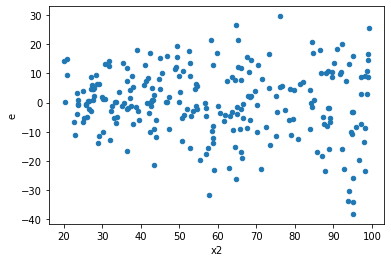

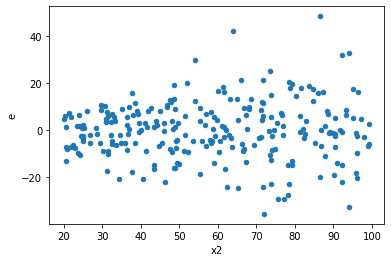

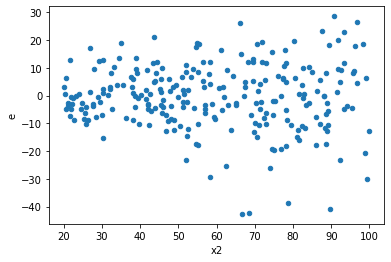

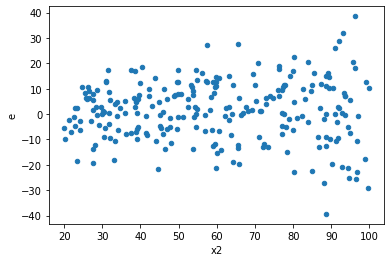

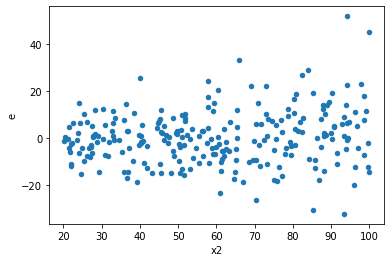

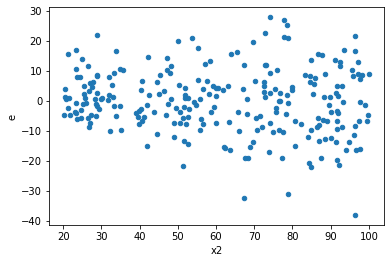

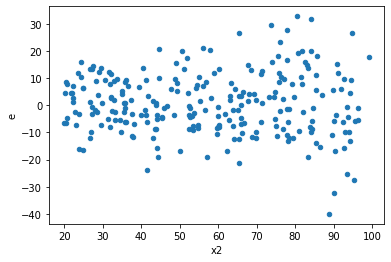

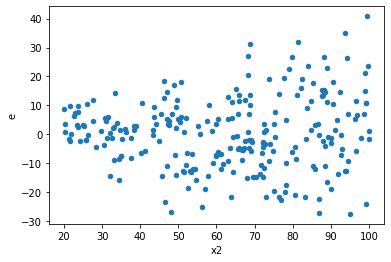

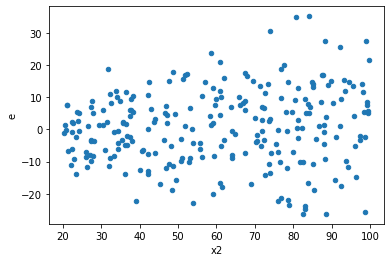

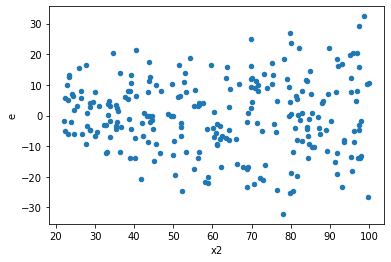

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,97.0,97.0,8557.967580431525,14540.612712136803,88.22646990135593,149.90322383646188,1.6990731240189636,0.009634732704647986,0.995182633647676,0.004817366352323993,Reject005=0 : Heteroscedasticity
1.0,97.0,97.0,8658.644184107283,17020.286765916342,89.26437303203384,175.46687387542622,1.9656988327522036,0.0010058869175790797,0.9994970565412105,0.0005029434587895398,Reject005=0 : Heteroscedasticity
2.0,97.0,97.0,9357.223307342425,16050.792116994253,96.46621966332397,165.4720836803531,1.715337081289865,0.00842239712443793,0.995788801437781,0.004211198562218965,Reject005=0 : Heteroscedasticity
3.0,97.0,97.0,7758.324885312063,19614.843374547538,79.98273077641302,202.21488014997462,2.5282317593688357,7.53349460103081e-06,0.9999962332526995,3.766747300515405e-06,Reject005=0 : Heteroscedasticity
4.0,97.0,97.0,7467.430759677667,19005.357681646783,76.98382226471821,195.93152249120394,2.545099953824969,6.511542232301437e-06,0.9999967442288838,3.2557711161507186e-06,Reject005=0 : Heteroscedasticity
5.0,97.0,97.0,11513.94139384251,13339.858521083224,118.70042674064443,137.52431465034252,1.1585831527870367,0.46987994781684117,0.7650600260915794,0.23493997390842059,Reject005=1 : Homoscedasticity
6.0,97.0,97.0,11503.414783562812,14921.010912043148,118.59190498518363,153.82485476333142,1.2970940536164728,0.20199539300128544,0.8990023034993573,0.10099769650064272,Reject005=1 : Homoscedasticity
7.0,97.0,97.0,12722.121832214327,14901.632865214173,131.1558951774673,153.6250810846822,1.1713166295484605,0.4375807523776445,0.7812096238111778,0.21879037618882224,Reject005=1 : Homoscedasticity
8.0,97.0,97.0,8641.811548579606,13410.942341880576,89.09084070700625,138.2571375451606,1.551867020761965,0.03155966221495499,0.9842201688925225,0.015779831107477493,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,8557.967580431525,14540.612712136803,88.22646990135593,149.90322383646188,1.6990731240189636,0.009634732704647986,Reject005=0 : Heteroscedasticity
1.0,97.0,97.0,8658.644184107283,17020.286765916342,89.26437303203384,175.46687387542622,1.9656988327522036,0.0010058869175790797,Reject005=0 : Heteroscedasticity
2.0,97.0,97.0,9357.223307342425,16050.792116994253,96.46621966332397,165.4720836803531,1.715337081289865,0.00842239712443793,Reject005=0 : Heteroscedasticity
3.0,97.0,97.0,7758.324885312063,19614.843374547538,79.98273077641302,202.21488014997462,2.5282317593688357,7.53349460103081e-06,Reject005=0 : Heteroscedasticity
4.0,97.0,97.0,7467.430759677667,19005.357681646783,76.98382226471821,195.93152249120394,2.545099953824969,6.511542232301437e-06,Reject005=0 : Heteroscedasticity
5.0,97.0,97.0,11513.94139384251,13339.858521083224,118.70042674064443,137.52431465034252,1.1585831527870367,0.46987994781684117,Reject005=1 : Homoscedasticity
6.0,97.0,97.0,11503.414783562812,14921.010912043148,118.59190498518363,153.82485476333142,1.2970940536164728,0.20199539300128544,Reject005=1 : Homoscedasticity
7.0,97.0,97.0,12722.121832214327,14901.632865214173,131.1558951774673,153.6250810846822,1.1713166295484605,0.4375807523776445,Reject005=1 : Homoscedasticity
8.0,97.0,97.0,8641.811548579606,13410.942341880576,89.09084070700625,138.2571375451606,1.551867020761965,0.03155966221495499,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    706
Reject005=1 : Homoscedasticity      294
Name: Result_test, dtype: int64